# Part 1 Analysis of dataset

In [1]:
import numpy as np
import pandas as pd

In [ ]:
#### we upload the first data set. We use a subset of the million song dataset. It contains 10001 song records. 

In [2]:
data = pd.read_csv("MillionSongSubset.csv")
data.head(5)

,SongNumber,SongID,AlbumID,AlbumName,ArtistID,ArtistLatitude,ArtistLocation,ArtistLongitude,ArtistName,Danceability,...,Energy,ArtistFamiliarity,Hotness,end_of_fade_in,key,keyConfidence,Loudness,mode,mode_confidence,start_of_fade_out
0,1,SOVLGJY12A8C13FBED,223563,Call of the Mastodon,ARMQHX71187B9890D3,NaN,Atlanta GA,NaN,Mastodon,0.0,...,0.0,0.780462,0.574275,0.238,5,0.555,-3.306,1,0.500,275.528
1,2,SOGXWRE12AC468BE24,781922,Out Of Time,ARTXS851187FB411C7,NaN,Essex England,NaN,Chris Farlowe,0.0,...,0.0,0.543393,0.338575,0.346,7,0.345,-11.027,0,0.590,175.078
2,3,SOIJPPR12A6D4F3945,85554,Wolfgang Amadeus Mozart: Requiem Mass_ K 626_ ...,ARYISOC1187B9998F1,36.03256,Nashville Franklin Brentwood,-86.78916,Choir & Great Symphony Orchestra of the All-Un...,0.0,...,0.0,0.484486,0.373953,0.827,9,0.000,-15.586,1,0.000,537.240
3,4,SOIMSZI12AB0182252,440144,Voices Of Americana: Delbert McClinton,ARJFOC01187FB413A5,33.59233,Lubbock TX,-101.85587,Delbert McClinton,0.0,...,0.0,0.699925,0.449669,0.142,4,0.470,-10.261,1,0.305,107.735
4,5,SOZECOE12AB017E615,619838,The Very Best Of,ARQ8FR81187FB58D27,NaN,NaN,NaN,Gloria De Haven,0.0,...,0.0,0.305466,0.035308,0.136,0,0.293,-14.088,0,0.372,105.599


In [4]:
data.shape ### 29 features, including 22 numerical varaibles and 7 categorical varaibles

(10001, 29)

In [25]:
data.columns

Index(['SongNumber', 'SongID', 'AlbumID', 'AlbumName', 'ArtistID',
       'ArtistLatitude', 'ArtistLocation', 'ArtistLongitude', 'ArtistName',
       'Danceability', 'Duration', 'KeySignature', 'KeySignatureConfidence',
       'Tempo', 'TimeSignature', 'TimeSignatureConfidence', 'Title', 'Year',
       'mbID', 'Energy', 'ArtistFamiliarity', 'Hotness', 'end_of_fade_in',
       'key', 'keyConfidence', 'Loudness', 'mode', 'mode_confidence',
       'start_of_fade_out'],
      dtype='object')

In [15]:
data = data.drop_duplicates(subset=['Title'])
data.shape ### remove duplicate song titles 

(9709, 29)

In [20]:
data['Year'].describe()

count    9709.000000
mean      927.148110
std       996.154446
min         0.000000
25%         0.000000
50%         0.000000
75%      2000.000000
max      2010.000000
Name: Year, dtype: float64

In [16]:
data.describe()

,SongNumber,AlbumID,ArtistLatitude,ArtistLongitude,Danceability,Duration,KeySignature,KeySignatureConfidence,Tempo,TimeSignature,...,Energy,ArtistFamiliarity,Hotness,end_of_fade_in,key,keyConfidence,Loudness,mode,mode_confidence,start_of_fade_out
count,9709.000000,9709.000000,3625.000000,3625.000000,9709.0,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,...,9709.0,9705.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000
mean,4959.473272,370738.072304,37.134758,-63.502464,0.0,238.485296,5.278710,0.448743,122.976323,3.563189,...,0.0,0.564732,0.384669,0.757853,5.278710,0.448743,-10.485252,0.691832,0.477039,229.954598
std,2887.977052,236799.777049,15.756395,50.827413,0.0,114.397303,3.550243,0.274875,35.225244,1.268395,...,0.0,0.159980,0.143033,1.878744,3.550243,0.274875,5.410783,0.461760,0.191399,112.473916
min,1.000000,63.000000,-41.280540,-162.436500,0.0,1.044440,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-51.643000,0.000000,0.000000,1.044000
25%,2455.000000,171356.000000,33.748310,-93.264930,0.0,175.960360,2.000000,0.224000,96.978000,3.000000,...,0.0,0.467414,0.324759,0.000000,2.000000,0.224000,-13.178000,0.000000,0.360000,168.699000
50%,4936.000000,332618.000000,38.997920,-80.143560,0.0,222.928530,5.000000,0.468000,120.129000,4.000000,...,0.0,0.562597,0.380005,0.197000,5.000000,0.468000,-9.369000,1.000000,0.487000,213.833000
75%,7458.000000,572855.000000,43.648560,-8.240550,0.0,276.139950,8.000000,0.658000,144.073000,4.000000,...,0.0,0.666523,0.453436,0.420000,8.000000,0.658000,-6.525000,1.000000,0.606000,266.217000
max,10001.000000,823599.000000,69.651020,174.767140,0.0,1819.767710,11.000000,1.000000,262.828000,7.000000,...,0.0,1.000000,1.082503,43.119000,11.000000,1.000000,0.566000,1.000000,1.000000,1813.426000


In [71]:
data.describe().columns

Index(['SongNumber', 'AlbumID', 'ArtistLatitude', 'ArtistLongitude',
       'Danceability', 'Duration', 'KeySignature', 'KeySignatureConfidence',
       'Tempo', 'TimeSignature', 'TimeSignatureConfidence', 'Year', 'Energy',
       'ArtistFamiliarity', 'Hotness', 'end_of_fade_in', 'key',
       'keyConfidence', 'Loudness', 'mode', 'mode_confidence',
       'start_of_fade_out'],
      dtype='object')

<Axes: >

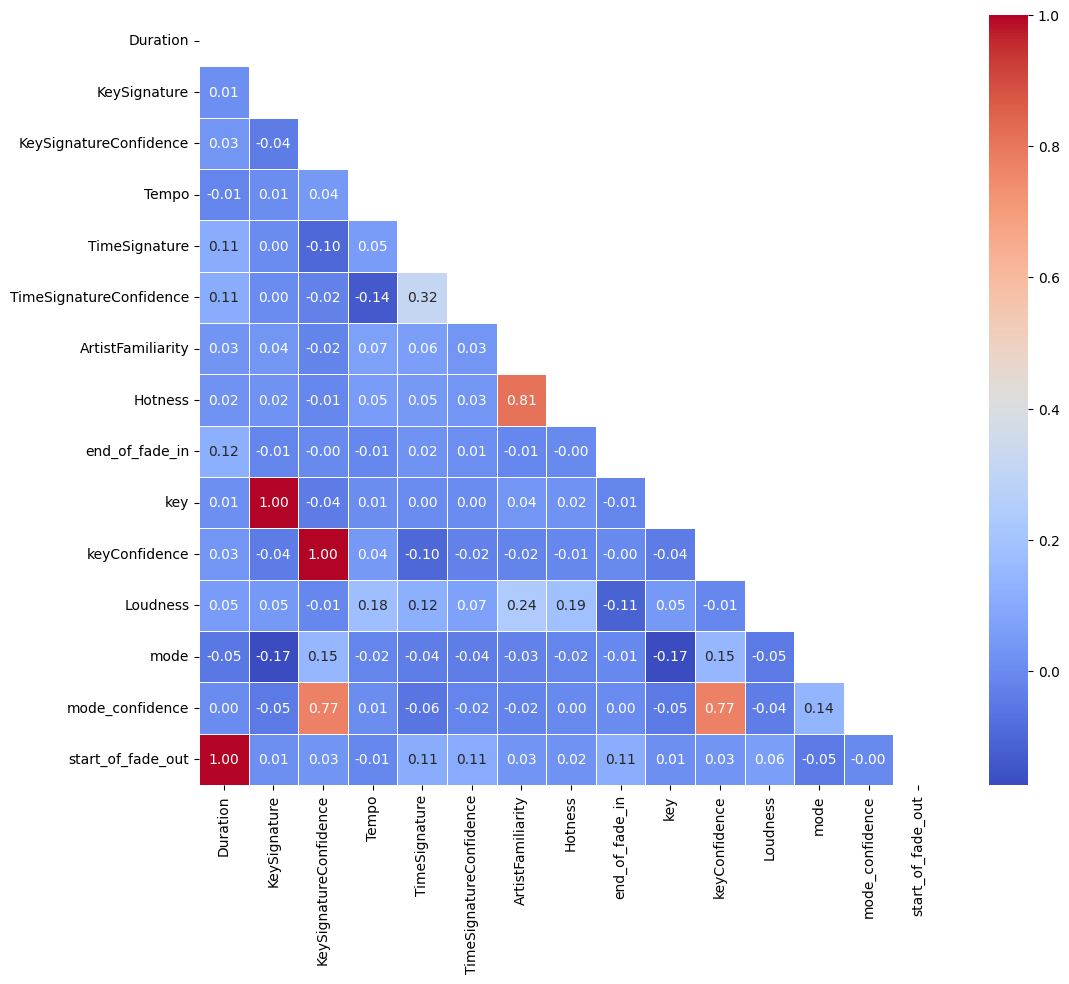

In [74]:
corr_matrix=data[['Duration', 'KeySignature', 'KeySignatureConfidence',
       'Tempo', 'TimeSignature', 'TimeSignatureConfidence','ArtistFamiliarity', 'Hotness', 'end_of_fade_in', 'key',
       'keyConfidence', 'Loudness', 'mode', 'mode_confidence',
       'start_of_fade_out']].corr()
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=.5,mask=np.triu(corr_matrix))

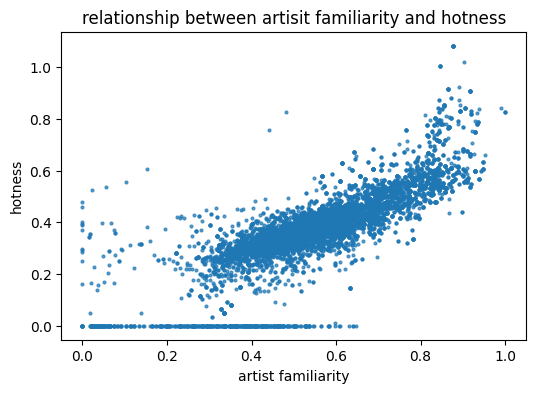

In [75]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.set_xlabel('artist familiarity')
ax.set_ylabel('hotness')
ax.set_title('relationship between artisit familiarity and hotness')
plt.scatter(popsong[['ArtistFamiliarity']],popsong[['Hotness']],s=4,alpha=0.7)

In [17]:
def most_pop_songs_in_year (year,data,k):
    data = data[data['Year']==year][['Title','ArtistName','Hotness']]
    sorted_df = data.sort_values(by='Hotness', ascending=False)
    if len(sorted_df)<=k:
        return sorted_df
    else:
        most_pop_songs = sorted_df.iloc[:k]
    return most_pop_songs
    

In [18]:
most_pop_songs_in_year (2000,data,10)

,Title,ArtistName,Hotness
2320,On My Own,Black Eyed Peas / Les Nubians / Mos Def,1.005942
6929,Magic,Black Eyed Peas / Terry Dexter,1.005942
9273,Tell Your Momma Come,Black Eyed Peas,1.005942
901,I'm Back,Eminem,0.804830
652,The Way I Am,Eminem,0.804830
606,Crawling (Album Version),Linkin Park,0.791143
1275,Pushing Me Away (Album Version),Linkin Park,0.779119
5786,New York,U2,0.750312
2631,Pero Me Acuerdo De Tí,Christina Aguilera,0.737884
5081,Genio Atrapado,Christina Aguilera,0.725746


In [22]:
most_pop_songs_in_year (1980,data,10)

,Title,ArtistName,Hotness
4207,Man In A Suitcase,The Police,0.615454
7601,Voices Inside My Head,The Police,0.615454
7545,Lose This Skin,The Clash,0.601186
1929,Passover,Joy Division,0.576295
4673,Hey Louise,Neil Diamond,0.564006
3274,Start!,The Jam,0.547746
5728,Jealous Again,Black Flag,0.547507
7022,Kill the Poor,Dead Kennedys,0.539245
6062,Fool For Your Loving,Whitesnake,0.531303
5948,Strange Thing,Buzzcocks,0.528795


In [23]:
most_pop_songs_in_year (2010,data,10)

,Title,ArtistName,Hotness
5399,Touch The Sky,Kanye West / Lupe Fiasco,1.082503
6561,Hey Daddy (Daddy's Home),Usher,0.854638
4464,Nothin' On You [feat. Bruno Mars] (Album Version),B.o.B,0.712535
43,You And Your Heart,Jack Johnson,0.677482
8033,Diamond Eyes (Album Version),Deftones,0.601730
9458,Lullaby For The Summer,Jimi Hendrix,0.595069
7047,Won Threw Ate,Story Of The Year,0.580095
1146,Play The Part,Eyes Set to Kill,0.564969
5439,Descontrol,Daddy Yankee,0.562507
6621,Hidden Documents,Alexandre Desplat,0.560381


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
columns = ['Danceability', 'Duration', 'KeySignature', 'KeySignatureConfidence',
       'Tempo', 'TimeSignature', 'TimeSignatureConfidence', 'Year',
       'Energy', 'ArtistFamiliarity', 'Hotness', 'end_of_fade_in',
       'key', 'keyConfidence', 'Loudness', 'mode', 'mode_confidence',
       'start_of_fade_out']

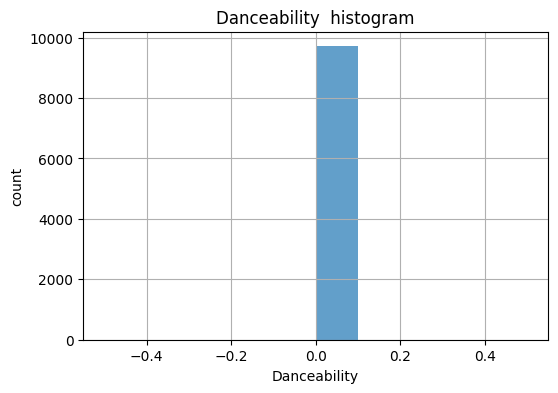

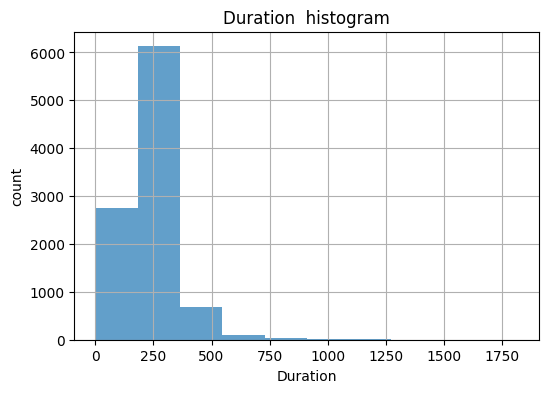

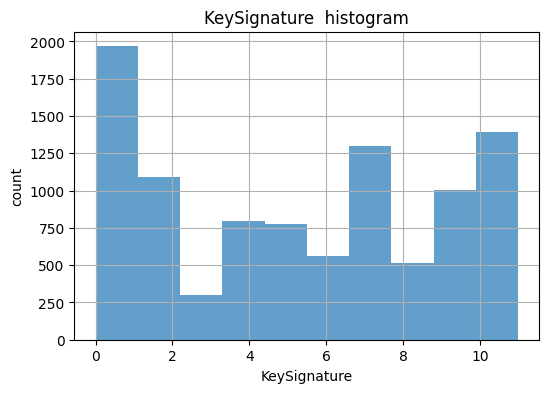

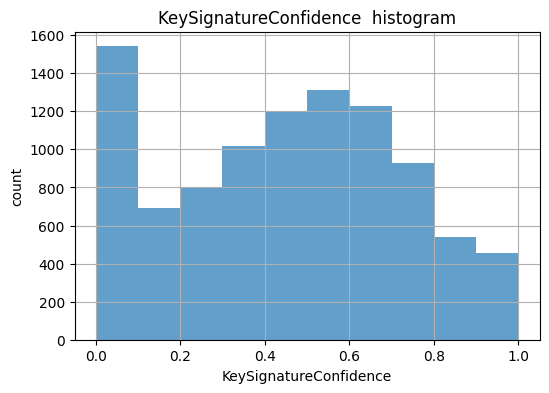

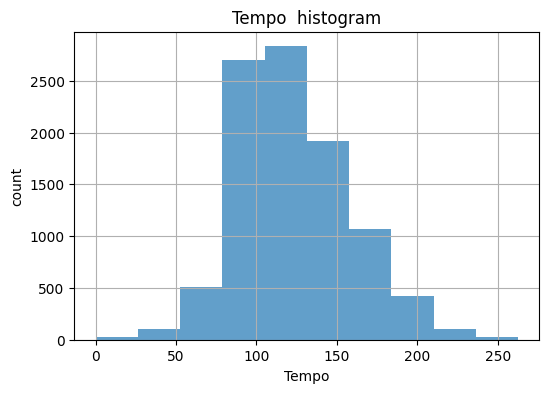

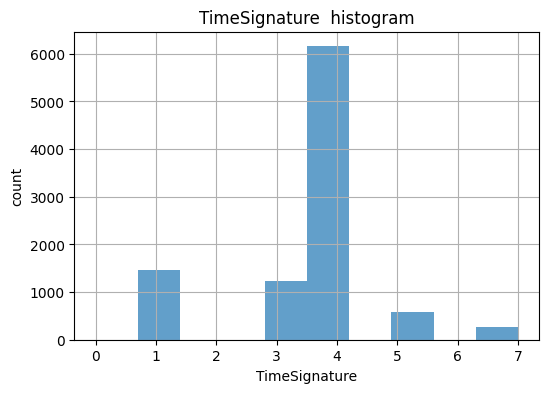

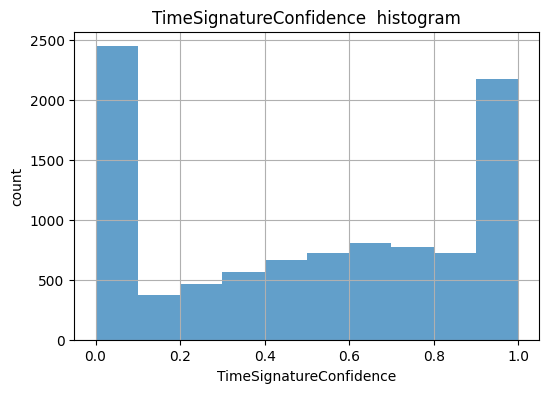

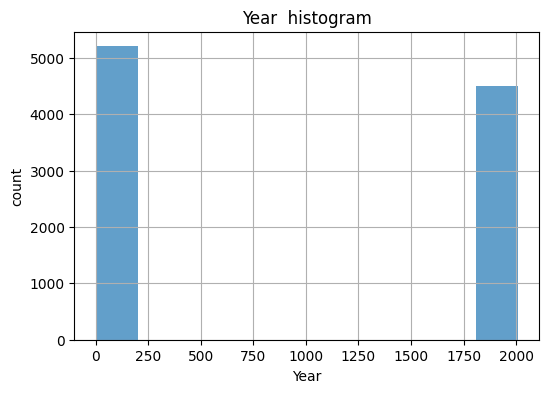

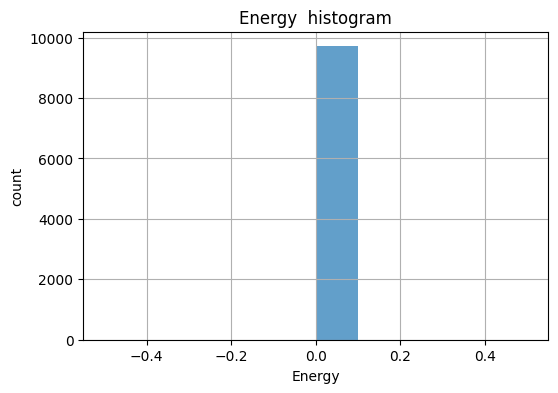

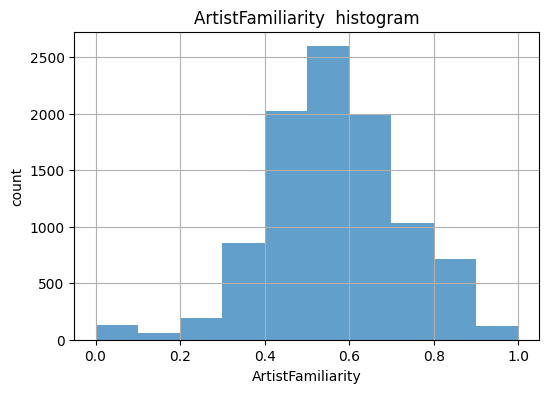

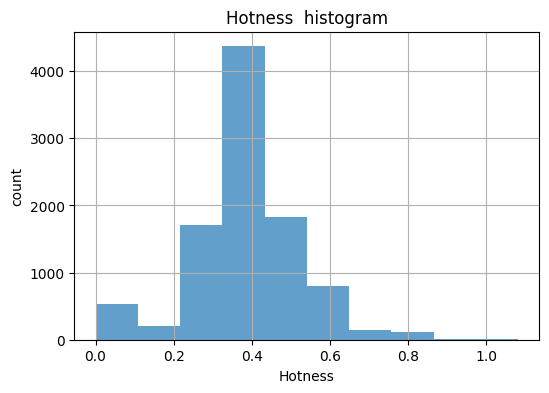

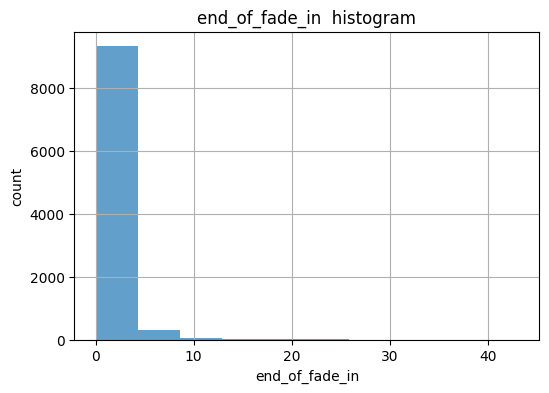

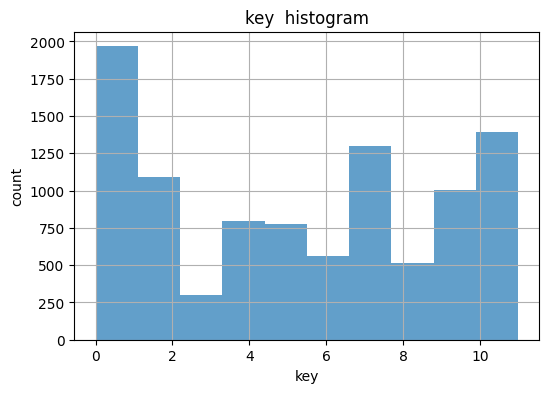

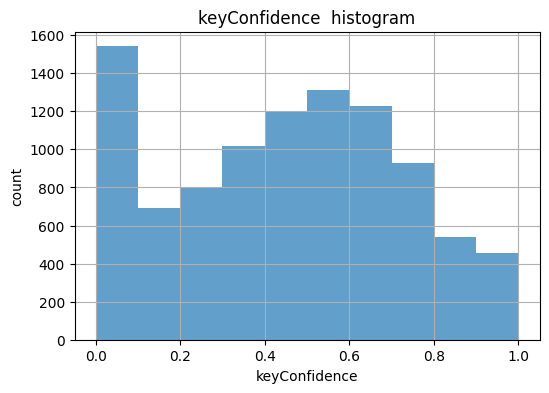

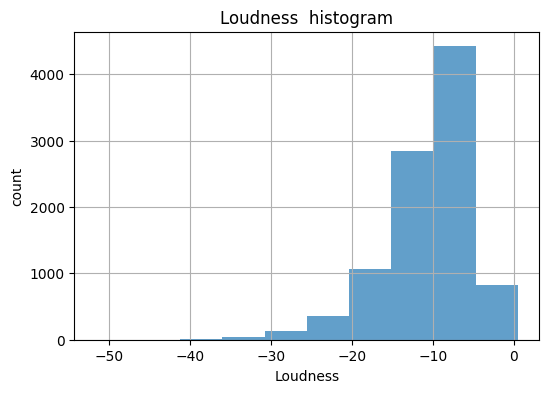

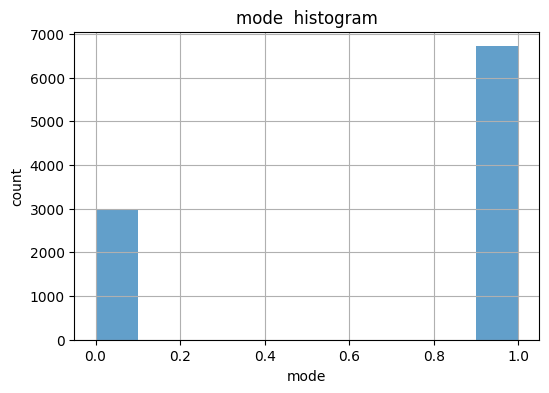

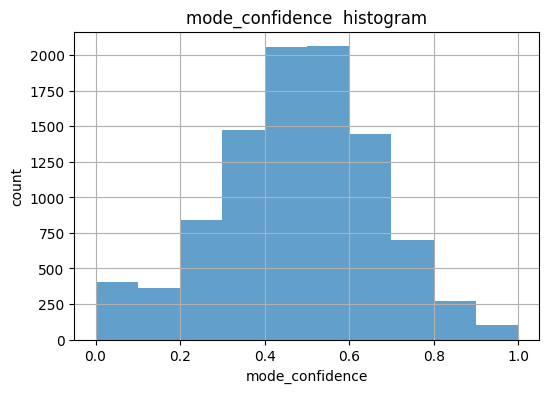

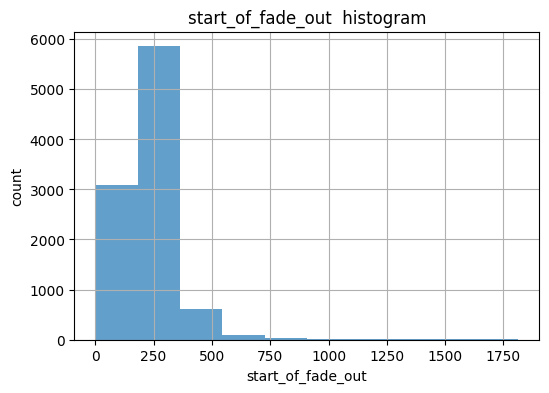

In [30]:
for column in columns:
    fig = plt.figure(figsize=(6,4))
    ax1 = fig.add_subplot(111)
    ax1.set_xlabel(column)
    ax1.set_ylabel('count')
    ax1.set_title(column +'  histogram')
    plt.hist(data[[column]],alpha=0.7)
    plt.grid(True)

In [40]:
print ('number of tracks that has year label is', len(data[data['Year'] != 0]['Year']))

number of tracks that has year label is 4507


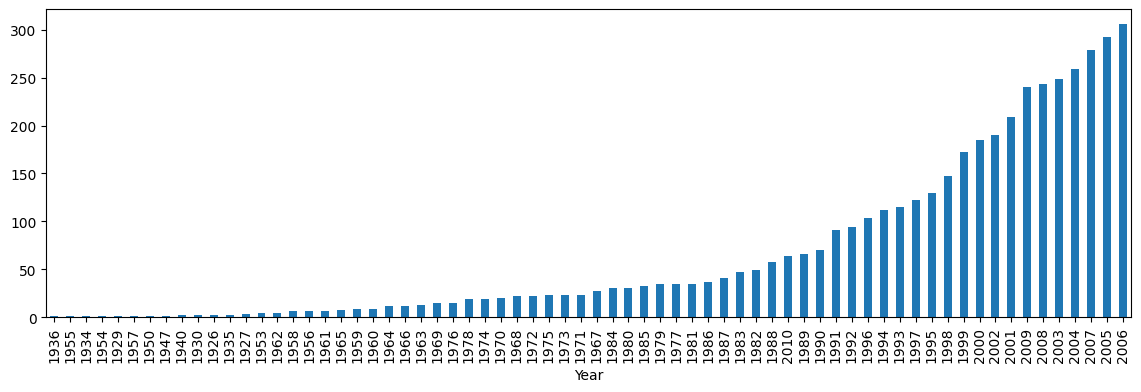

In [39]:
fig = plt.figure(figsize=(14,4))
data[data['Year'] != 0]['Year'].value_counts().plot(kind='bar')
plt.gca().invert_xaxis() 
### We visualize how many songs were released for each year in this dataset.

In [ ]:
##### visualize artist locations ofthe most popular artist 

In [56]:
loc = data[['ArtistLatitude','ArtistLongitude','ArtistLocation','ArtistName','ArtistFamiliarity']]
loc = loc[loc['ArtistFamiliarity']>=0.9]
loc = loc.dropna()
loc['artist+location'] = loc['ArtistName'] + '--' + loc['ArtistLocation']
loc.shape

(66, 6)

In [57]:
loc.head()

,ArtistLatitude,ArtistLongitude,ArtistLocation,ArtistName,ArtistFamiliarity,artist+location
93,13.11199,-59.59895,St Michael Barbados,Rihanna,0.917699,Rihanna--St Michael Barbados
159,54.31407,-2.23001,UK,Muse,0.929030,Muse--UK
227,34.05349,-118.24532,Kentwood LA; Los Angeles CA,Britney Spears,0.947328,Britney Spears--Kentwood LA; Los Angeles CA
591,18.22328,-66.42889,Puerto Rico,Daddy Yankee,0.908984,Daddy Yankee--Puerto Rico
823,34.05349,-118.24532,Kentwood LA; Los Angeles CA,Britney Spears,0.947328,Britney Spears--Kentwood LA; Los Angeles CA


In [58]:
lat = loc['ArtistLatitude']
long = loc['ArtistLongitude']
artist = loc['artist+location']

In [59]:
import folium

# Create a map centered around the mean of the coordinates
map_center = [sum(lat)/len(lat), sum(long)/len(long)]
mymap = folium.Map(location=map_center, zoom_start=2)

# Add markers for each coordinate
for lat, lon, artist in zip(lat, long, artist):
    folium.Marker(location =[lat, lon],popup=folium.Popup(artist, parse_html=True)).add_to(mymap)

# Display the map
mymap

In [ ]:
#below function give you n most popular songs ranked by either hotness or artist familiarity

In [60]:
popsong = data[['ArtistName','Title',  'ArtistFamiliarity', 'Hotness']]
popsong = popsong.dropna()
popsong = popsong.reset_index(drop=True)
indx_hotness = popsong['Hotness'].sort_values(ascending=False).index
indx_fam = popsong['ArtistFamiliarity'].sort_values(ascending=False).index

In [61]:
def top_popular_song(n,metric):
    for i in range(n):
        print ('top', i+1, "most popular song is\n", popsong.iloc[metric[:n]]['Title'].iloc[i], 
           'by artist',popsong.iloc[metric[:n]]['ArtistName'].iloc[i],'\n')

In [62]:
top_popular_song(2,indx_hotness)

top 1 most popular song is
 School Spirit Skit 2 by artist Kanye West 

top 2 most popular song is
 Diamonds From Sierra Leone by artist Kanye West 



In [63]:
top_popular_song(5,indx_fam)

top 1 most popular song is
 Gun Shot by artist Akon 

top 2 most popular song is
 Over The Edge by artist Akon 

top 3 most popular song is
 Don't Matter by artist Akon 

top 4 most popular song is
 Fly Talkin' by artist Lil Wayne 

top 5 most popular song is
 Emergency (Album Version) by artist Paramore 



In [ ]:
# part 2 Model 1 - recommend song based on the artist 

In [ ]:
play = pd.read_csv('train_triplets.txt',header=None,names=["user",'SongID','count'],sep="\t")
play.head()
data = pd.read_csv("MillionSongSubset.csv")
newdata = data[['SongID','ArtistName','Hotness','Title']]

In [ ]:
newdata.groupby('ArtistName').count().sort_values(by="SongID",ascending=False)

In [ ]:
merged = play.merge(newdata,left_on="SongID",right_on='SongID',how ='left')
df = merged[merged['Title'].notna()]

In [ ]:
#### We know that if one likes a song, they might like the other songs produced by the same artist. 
#### Here we provided a simple function that recommends the top 5 played songs by the same artist, given an input song.
#### If there are less than 5 songs by the same artist in the data base, it will provide all other songs by the same artist 

In [ ]:
def recommend_based_on_artist(songname):
    songid = df[df['Title']==songname]['SongID'].iloc[0]
    artist = df[df['Title']==songname]['ArtistName'].iloc[0]
    songs = df[df['ArtistName']==artist]['SongID']
    songlist = []
    for song in songs:
        songlist.append(song)
    songlist = list(set(songlist))
    songlist.remove(songid)
    rank = {}
    for song in songlist:
        rank[newdata[newdata["SongID"]==song]['Title'].iloc[0]] = song_count.loc[song].iloc[0]
    rank = dict(sorted(rank.items(), key=lambda item: item[1], reverse=True))
    print ('Other songs you might like by',artist)
    if len(rank) <=5:
        for key in rank.keys():
            print (key)
    else:
        for key in list(rank.keys())[:5]:
            print (key) 

In [ ]:
recommend_based_on_artist("Crazy")

In [ ]:
## the recommendation system provide 5 most played songs by Aerosmith besides "Crazy"

In [ ]:
# part 3 Model 2 - recommend songs based on play counts 

In [ ]:
play = pd.read_csv('train_triplets.txt',header=None,names=["user",'SongID','count'],sep="\s+")

In [ ]:
data = pd.read_csv("MillionSongSubset.csv")

In [ ]:
newdata = data[['SongID','ArtistName','Hotness','Title']]
merged = play.merge(newdata,left_on="SongID",right_on='SongID',how ='left')

In [ ]:
### remove rows where the song title is not available

In [ ]:
df = merged[merged['Title'].notna()]

In [ ]:
# select the 1k most played songs 

In [ ]:
df_song = df.groupby('SongID').sum()

In [ ]:
sorted_song = df_song.sort_values(by='count',ascending=False)

In [ ]:
idx = sorted_song.index[:1000]
idx  ### find the top 1k song 

In [ ]:
df = df[df['SongID'].isin(idx)]
df.shape

In [ ]:
# pivot the dataset that contains the 1k most played songs

In [ ]:
wide_df = df.pivot(index = 'SongID' , columns = 'user', values = 'count').fillna(0)
#wide_df_sparse = csr_matrix(wide_df.values)

In [ ]:
filtered_df = wide_df.loc[:,wide_df.sum()>=2] ### drop the columns where the user only played one song

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(filtered_df)

In [ ]:
def recommendsong (songname):
    songid = newdata[newdata['Title']==songname]['SongID'].iloc[0]
    index = list(filtered_df.index).index(songid)
    input = np.array(filtered_df.iloc[index]).reshape(1,-1)
    distances, indices = model_knn.kneighbors(input, n_neighbors = 6)
   
    for i in range(0,len(distances.flatten())): 
        if i == 0:
             print ('input song name is', songname) 
        else:
            title = newdata[newdata['SongID']==filtered_df.index[indices[0][i]]]['Title'].iloc[0]
            artist = newdata[newdata['SongID']==filtered_df.index[indices[0][i]]]['ArtistName'].iloc[0]
            distance = distances[0][i]
            print ('recommend song is ',title, "BY", artist, 'with distance',distance)
    

In [ ]:
recommendsong("Don't Panic")

In [ ]:
#### use sparse matrix to improve the speed

In [ ]:
from scipy.sparse import csr_matrix
wide_df_sparse = csr_matrix(filtered_df.values)

In [ ]:
sparse_model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
sparse_model_knn.fit(wide_df_sparse)

In [ ]:
def sparse_recommendsong (songname):
    songid = newdata[newdata['Title']==songname]['SongID'].iloc[0]
    index = list(filtered_df.index).index(songid)
    input = np.array(filtered_df.iloc[index]).reshape(1,-1)
    distances, indices = sparse_model_knn.kneighbors(input, n_neighbors = 6)
   
    for i in range(0,len(distances.flatten())): 
        if i == 0:
             print ('input song name is', songname) 
        else:
            title = newdata[newdata['SongID']==filtered_df.index[indices[0][i]]]['Title'].iloc[0]
            artist = newdata[newdata['SongID']==filtered_df.index[indices[0][i]]]['ArtistName'].iloc[0]
            distance = distances[0][i]
            print ('recommend song is ',title, "BY", artist, 'with distance',distance)
    

In [ ]:
sparse_recommendsong ("One I Love")

In [ ]:
# part 4 Model 3 - recommend songs using user based collaborative filtering 

In [ ]:
play = pd.read_csv('train_triplets.txt',header=None,names=["user",'SongID','count'],sep="\t")

In [ ]:
data = pd.read_csv("MillionSongSubset.csv")
newdata = data[['SongID','ArtistName','Hotness','Title']]

In [ ]:
merged = play.merge(newdata,left_on="SongID",right_on='SongID',how ='left')
merged = merged.dropna()

In [ ]:
group_user = merged.groupby('user').count().sort_values(by='SongID')
index = group_user[group_user['SongID']>=4].index ### get index. reduce dataset 

In [ ]:
df = merged[merged['user'].isin(list(index))].reset_index()
df.shape
df = df.drop(columns='index')

In [ ]:
df = df.drop_duplicates()
df = df.pivot(index = 'user' , columns = 'SongID', values = 'count').fillna(0)